## Linear Regression

In this notebook, we will a make linear regression analysis on a car price dataset, show how this prediction analysis is done and what are the important assumptions that must be satisfied for linear regression. We will also look at different ways to transform our data, we are trying to understand the factors that influence the sale price of the cars, specifically, which factors drive the car prices up, and how accurately we can predict the sale price based on the car's features.

First we import the neccesary libraries

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy.stats.mstats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 

In [2]:
#we make this function to avoid warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### **Reading and understanding our data**


For this project we will be using the car sales dataset located in [kaggle.com](https://www.kaggle.com/datasets/goyalshalini93/car-data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01), the data set contains all the information about cars, sale price of a car, and all car's technical parameters.

Let's read the data into pandas data frame and let's see some basic information about the data to see how to proceed.

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
# data.shape #(205, 26)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We can find more information about the features, number of non-null entries and types using the info() method.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

We hace 205 rows, 26 features and since we have for each features 205 non null entries then there is no missing values, our target variable is the feature "Price" and the rest of the features are the predictor variables, we can also see we have 10 object data types, 8 int64 and 8 float64 data types.

Next, let's look at some statistical information about our numerical data.

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Cleaning and Wrangling


Although we had already verified it before, let's check if we have any missing values, with the nest two functions.

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Also, let's check for any duplicates, with the feature "car_ID", since each row has a unique car ID value.

In [7]:
sum(data['car_ID'].duplicated()) == 0
# sum(data.duplicated(subset = 'car_ID')) == 0

True

We will describe all categories of the "CarName" attribute, to try to simplify our data.

In [8]:
data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see that the attribute "CarName" includes both the car name and the company name (brand). Next, we want to split each company name from the model of a car, we will focus on a company name only.

In [9]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.lower()

Let's see all the brands now.

In [10]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Now, let's simplify the names of the brans, since there are some extra names.

In [11]:
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')

Now let's see how it looks like the names of the brans.

In [12]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

It works, some useless names have been combined.

Now we can drop 'car_ID', 'symboling', and 'CarName' from our data frame, since they will no longer be needed.

In [13]:
data.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)
# data.drop(['car_ID', 'symboling', 'CarName'], axis=1 inplae = True)

In [14]:
data.shape #(205, 26)

(205, 24)

We had 26 features, added 1 more and removed 1 and now we have 24 features.

Now, for better visualizations and analysis. We will group our data by "brand", we will calculate the average price for each brand, and split these prices into 3 bins ("Budget", "Mid-Range", and "Luxury"), we will also name the newly created category like "brand_category".

In [15]:
data_comp_avg_price = data[['brand','price']].groupby('brand', as_index = False).mean().rename(columns={'price':'brand_avg_price'})
data_comp_avg_price

,brand,brand_avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.500000
8,jaguar,34600.000000
9,mazda,10652.882353


In [16]:
data = data.merge(data_comp_avg_price, on = 'brand')
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714


We will now check the statistics of our average car price per car brand and we will create the new feature call "brand_category".

In [17]:
data.brand_avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [18]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))
data['brand_category'].head(10)

0    Mid_Range
1    Mid_Range
2    Mid_Range
3    Mid_Range
4    Mid_Range
5    Mid_Range
6    Mid_Range
7    Mid_Range
8    Mid_Range
9    Mid_Range
Name: brand_category, dtype: object

## Exploratory Data Analysis

Now let's see the list of top features that have high correlation coefficient, we will use the "corr()" function that calculates the Pearson'r correlation coefficients with respect to the target variable "price".

In [19]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

There are highly correlated numerical features with "Price".

Now let's use the "pairplot()" function to see in a graphic way the the relationship between all features, mainly the target variable "Price"

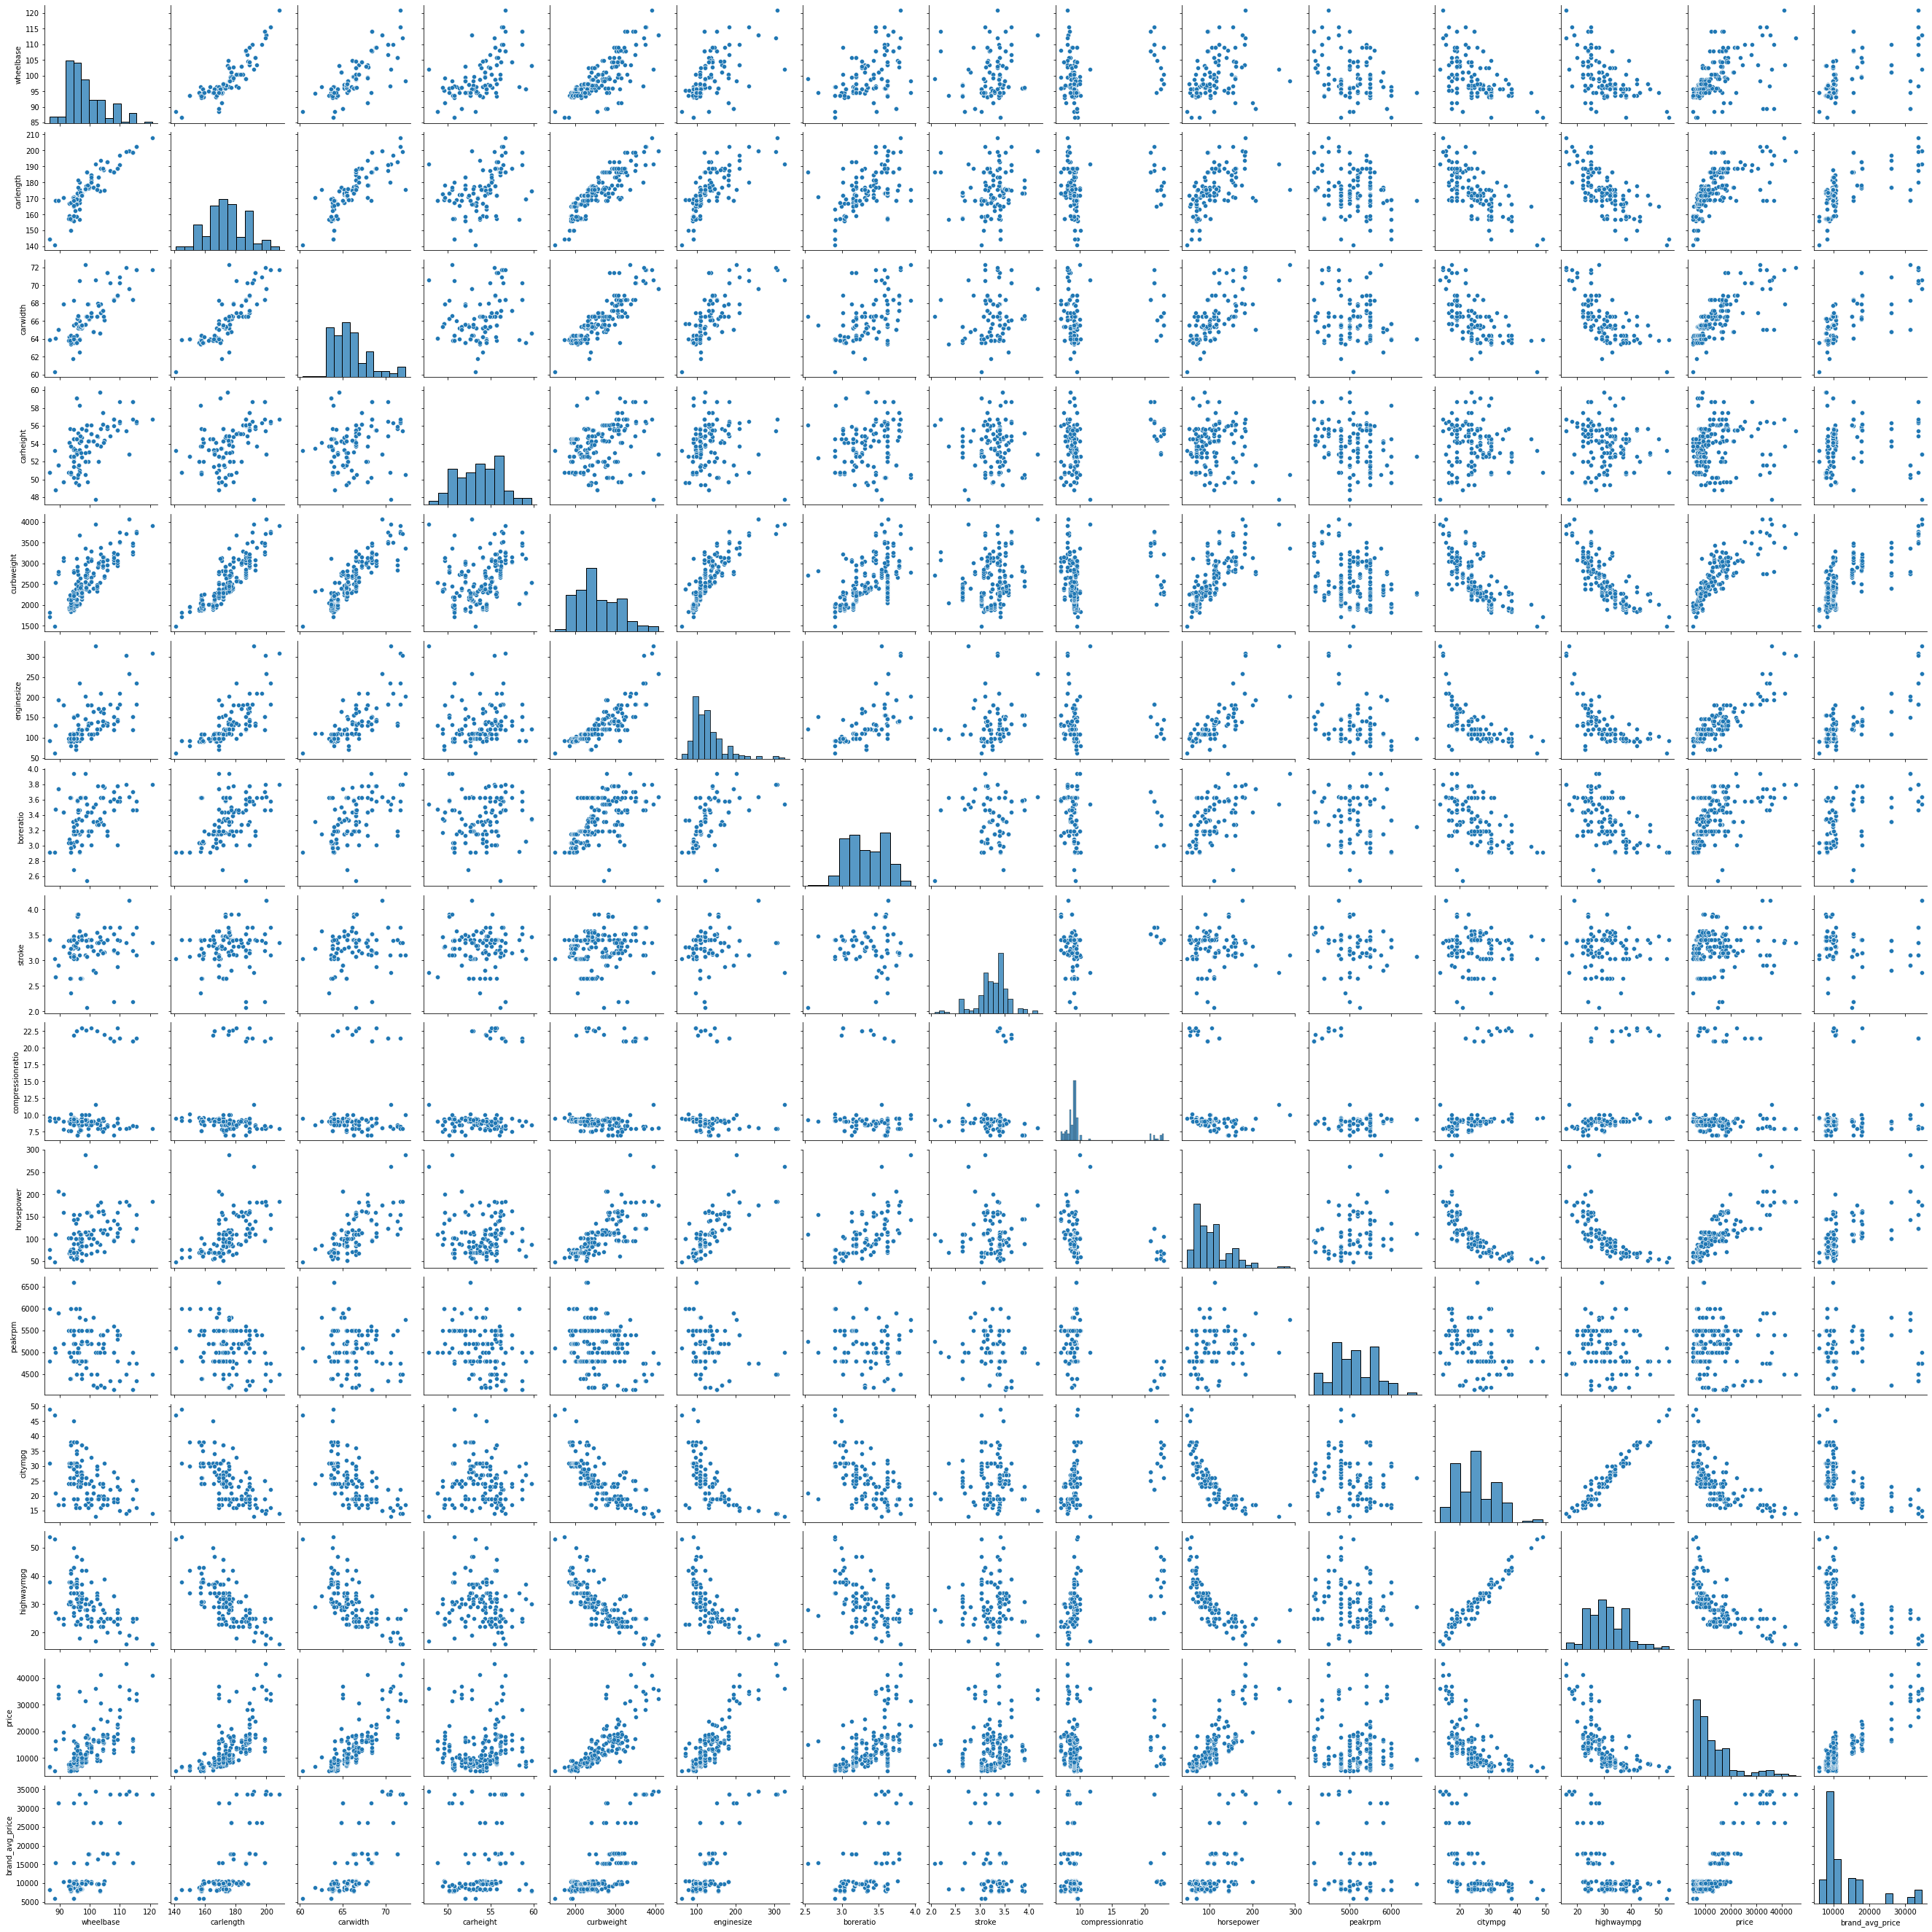

In [20]:
sns.pairplot(data) 
plt.show()

## Testing Assumptions for Linear Regression

Since we are trying to fit a linear model, we assume that the relationship between the target variable (price) and other features is linear.

We also expect that the errors, or residuals, are pure random fluctuations around the true line, in other words, the variability in the response variable (dependent) doesn't increase as the value of the predictor (independent) variable increases. This is the assumption of equal variance, also known as "Homoscedasticity".

We also assume that the observations are independent of one another, no "multicollinearity", and there is no correlation between the sequential observations.

If we see one of these assumptions in the dataset are not true, it's more likely that the other ones, mentioned above, will also be violated. Luckily, we can check and fix these assumptions with a few techniques, now let's look at each of these assumptions in our example.

## Linearity Assumption

As we said before, linear regression needs the relationship between independent variable and the dependent variable to be linear. We can test this assumption with some scatter plots and regression lines.

We will start with the "enginesize" and "curbweight" features, since both were two of the features most closely related to the target variable in a lineal way.

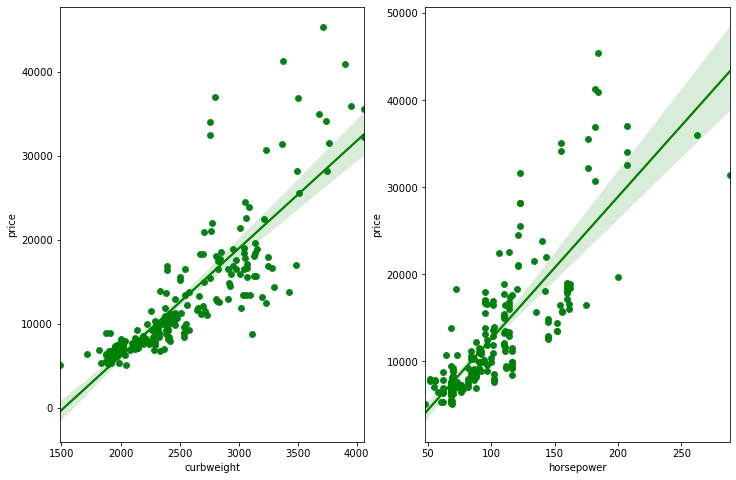

In [21]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = data.curbweight, y = data.price,  ax=ax1)
sns.regplot(x=data.curbweight, y=data.price, ax=ax1, color='green')
 
sns.scatterplot(x = data.horsepower,y = data.price, ax=ax2)
sns.regplot(x=data.horsepower, y=data.price, ax=ax2, color='green');


We can check more closely the linear relationship of some features with the next function, we choose this time the "horsepower" feature as an example.

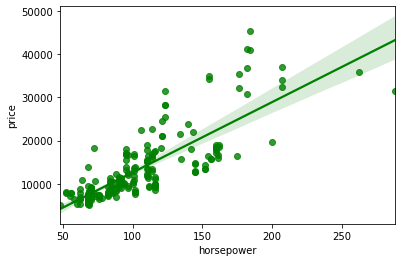

In [22]:
sns.regplot(x=data.horsepower, y=data.price, data=data, color='green');

## Homoscedasticity

Now it's important for linear regression models to have contant variance, that is call homoscedasticity that is a statistical property that refers to the equality or constancy of the variance of the errors or residuals of a model at all levels of a predictor variable. In other words, it implies that the dispersion of errors is constant over the entire range of values of an independent variable.

Let's see the homostaciidty graphically.

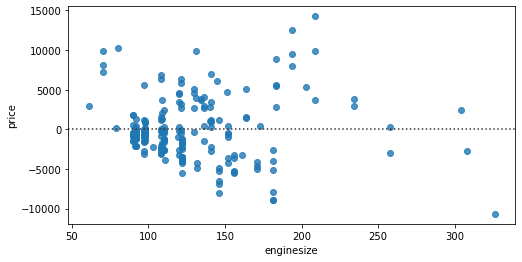

In [23]:
plt.subplots(figsize = (8,4))
sns.residplot(x=data.enginesize, y=data.price)

We can see from above that the error variance across the true line is dispersed somewhat not uniformly, but in a funnel like shape, so, the assumption of the "homoscedasticity" is more likely not true.

## Normality

The linear regression analysis requires the dependent variable "price" to be normally distributed. This we can check it with a histogram and see if the targer varible is normally distributed or not, in case it is not normally distributed we can fix it with in a several ways.


Let's see a histogram of the "price" to show how our target variable behaves.

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

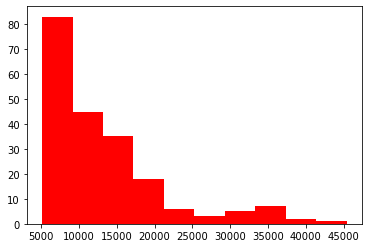

In [24]:
plt.hist(data.price, color='red', bins=10)

We can see from the above that our target varibale is not normally distributed and besides it's right skewed, we can also check if it's normally distributed with a test using normaltest() funtion, that is if the p-value is large than >0.05 we can say our target variable ("price") is normally distributed.

In [25]:
normaltest(data.price.values)

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

From above we can see that p-value is far from satisfying our condition that is p-value 0.05.

Luckyli we can fix this problem is several ways, this time we are going to apply to the target varible a log transformation to correct it and make it more normally distributed, first we will save our data that we have changed so far, in the "previous_data" frame.

In [26]:
previous_data = data.copy()

#We transform and save it in the same column
data['price'] = np.log(data['price'])

Now let's check our p-value, after the transformation.

In [27]:
normaltest(data.price.values)

NormaltestResult(statistic=14.10341345775947, pvalue=0.0008659297880185564)

As we can see, the condicion is not met yet but we are close  to satisfying our condition and with that is enought, now we make a histogram to see graphically how it looks like.

(array([15., 41., 37., 28., 21., 35.,  8.,  5., 10.,  5.]),
 array([ 8.54051902,  8.75879385,  8.97706869,  9.19534353,  9.41361836,
         9.6318932 ,  9.85016804, 10.06844287, 10.28671771, 10.50499255,
        10.72326738]),
 <a list of 10 Patch objects>)

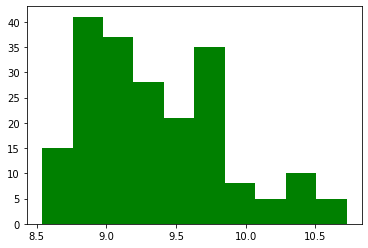

In [28]:
plt.hist(data.price, color='green', bins=10)

Now we can say is more normally distributed than the values before the log transform.

## Multicollinearity

Another important thing to keep in mind is the Multicollinearity that is when there is a strong correlation between the independent variables. Linear regression and multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:

We will use a heatmap() function to see wheter there is multicollinearity or not in our independent variables.

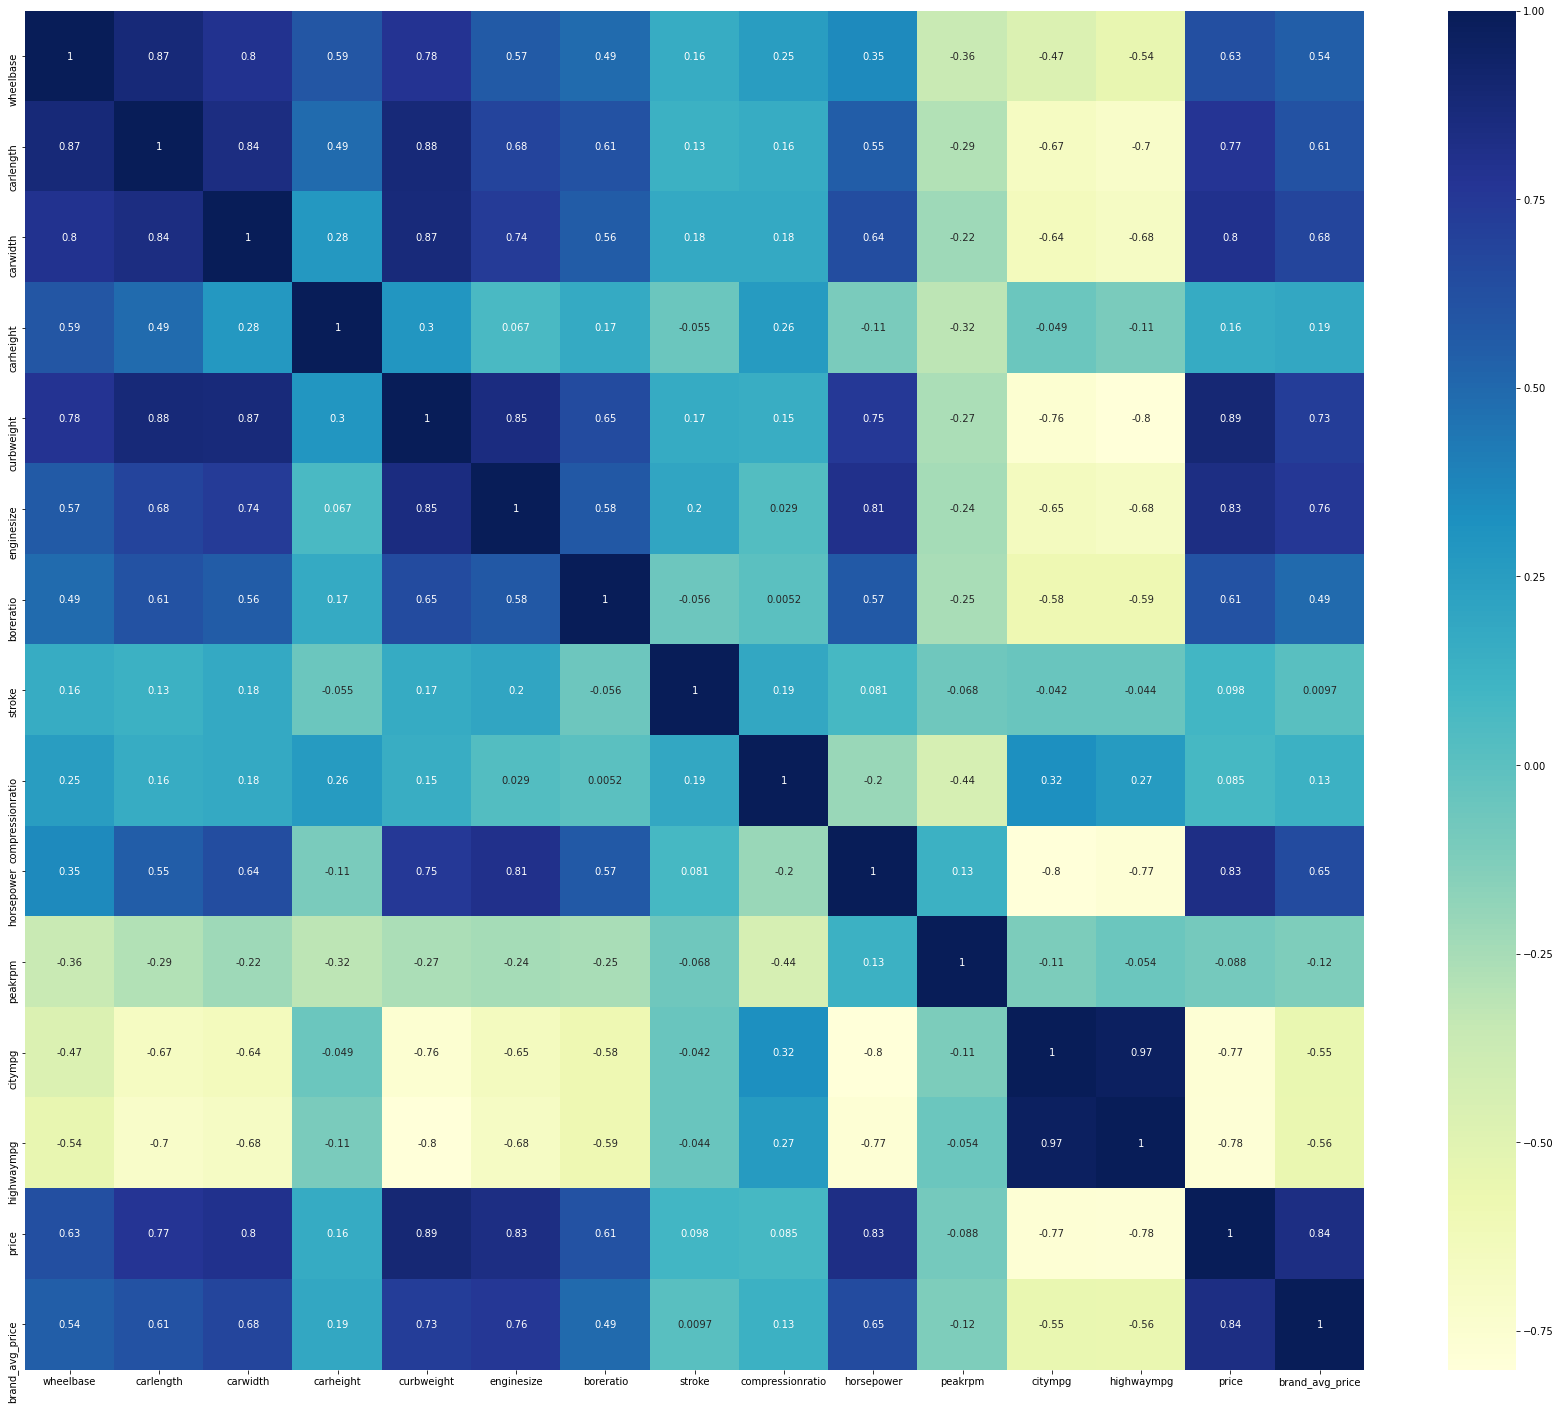

In [29]:
num = data.select_dtypes(include = ['int64', 'float64']) 
plt.figure(figsize = (30, 25)) 
sns.heatmap(num.corr(), annot = True, cmap="YlGnBu") 
plt.show()

As we can see , there are some multicollinearity inside our data, we will keep them for now, however there is some ways to fix this problem, I think the best way to solve this problem is with regularization techniques, such as Ridge and Lasso regression, for now we won't do either of them.

## **Linear Regression Model**


These are the list of the significant variables after Exploratory Data Analysis :

Numerical:
[curbweight, carlength, carwidth, enginesize, boreratio, horsepower, wheelbase, citympg, highwaympg]

Categorical:
[enginetype, fueltype, carbody, aspiration, cylindernumber, drivewheel, brandcategory]


We are going to put all the selected features into a data frame.


In [30]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category','curbweight', 'enginetype', 
         'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']

selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


We can find the categorical columns by  iterating  through the "dtypes"  attribute.

In [31]:
categorical_columns=[key for key, value in selected.dtypes.iteritems()  if value == "object"]
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

We can also find the names of the numeric columns.

In [32]:
numeric_columns=list(set(columns)-set(categorical_columns)) 
numeric_columns

#This line below also works in the same way
# numeric_columns = [i for i, value in selected.dtypes.iteritems() if value == 'float64' or value == 'int64']
# numeric_columns

['highwaympg',
 'boreratio',
 'curbweight',
 'carwidth',
 'enginesize',
 'horsepower',
 'citympg',
 'wheelbase',
 'price',
 'carlength']

Now we can split the data into the features "X" and target "y".


In [33]:
X = selected.drop("price", axis=1)
X.head()
# X.shape #(205, 16)

,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,gas,std,hatchback,rwd,94.5,Mid_Range,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,gas,std,sedan,fwd,99.8,Mid_Range,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,gas,std,sedan,4wd,99.4,Mid_Range,2824,ohc,five,136,3.19,115,176.6,66.4,18,22


In [34]:
y = selected["price"].copy()
y.head()

0    9.510075
1    9.711116
2    9.711116
3    9.543235
4    9.767095
Name: price, dtype: float64

Before we used one-hot encoding to deal with the categorical data, let's check the distribution of the categorical variables:


In [35]:
for column in  categorical_columns:
    print("column name:", column)
    print("Types -- count")
    print( X[column].value_counts())
    print()

column name: fueltype
Types -- count
gas       185
diesel     20
Name: fueltype, dtype: int64

column name: aspiration
Types -- count
std      168
turbo     37
Name: aspiration, dtype: int64

column name: carbody
Types -- count
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

column name: drivewheel
Types -- count
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

column name: brand_category
Types -- count
Budget       95
Mid_Range    86
Luxury       24
Name: brand_category, dtype: int64

column name: enginetype
Types -- count
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

column name: cylindernumber
Types -- count
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64



We see many categorical features have few or one occurrence. For example, we see "three", "twelve" only occur once in the column "cylindernumber", this is fine as one-hot encoding is a deterministic transform, so we can apply the tranformation directly.

## OneHotEncoder


We will use these functions.

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

To perform one-hot encoding, we use the `ColumnTransformer` class, this allows different columns or column subsets to be transformed separately.

In [37]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns) ],remainder="passthrough")
X=one_hot.fit_transform(X)
type(X)

numpy.ndarray

We see the output is a NumPy array, so let's get the feature names using  "get_feature_names_out()" method. 

The output  will be the feature name with the  prefix of the name of the transformer. For one-hot encoding, the prefix will also include the name of the column that generated that feature.

In [38]:
names=one_hot.get_feature_names_out()
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Budget', 'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Mid_Range', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       'remain

Let's remove the prefix from the string, with the next function.

In [39]:
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
colunm_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'category_Budget',
 'category_Luxury',
 'category_Mid_Range',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

We can save the result as a dataframe with the usual name "df".


In [40]:
df=pd.DataFrame(data=X,columns=colunm_names)
#df.to_csv('cleaned_car_data.csv', index=False)
df.head()
# df.shape #(205, 38)

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0


## Train Test Split


Now we are going to split tour data into training and testing sets, we will use 70% of the data for training and 30% for testing.

In [41]:
X_train, X_test, y_train, y_test = train_test_split( df, y, test_size=0.30, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 38) (62, 38) (143,) (62,)


## Standardize the Data


We use the function "StandardScaler" to standardize our data.

In [42]:
ss=StandardScaler()
ss
#We fit our training data, then transform it.
X_train=ss.fit_transform(X_train)

## Linear Regression


Last and finally, we make the linear refression and apply the "LinearRegression()" fucntion.

In [43]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

We make the predcition for testing .

In [44]:
X_test=ss.transform(X_test)
car_price_predictions = lm.predict(X_test)
car_price_predictions

array([ 8.87368304,  9.76331696,  9.37619842,  8.20809049,  9.25745786,
        9.34999919,  8.689579  ,  8.80059779,  9.65140161,  8.81774326,
        9.8938222 , 11.24667301,  9.44950493,  9.481259  ,  8.72871162,
        9.27212737,  9.08262263,  9.59959188,  9.00069293,  8.7891817 ,
        9.23208309,  9.57673884,  9.1051809 ,  9.32525256,  9.77744006,
        8.84073863,  8.88827629,  9.61747728,  8.88440132,  8.87820614,
        9.14354562,  9.25682971,  9.95926555,  9.11083654,  8.8941763 ,
       10.41503322,  9.46099431,  9.69174397,  8.76421616, 10.39857862,
        8.71730437,  9.46022563, 10.49092027,  9.43574582,  9.28851633,
        8.85645216,  8.83208564,  9.46205321,  9.21390927,  9.16505643,
        9.87649543,  8.85499701,  8.94926626,  9.1589375 ,  9.96129128,
        9.75392034,  9.19284805, 10.00570084,  9.19349866,  8.79387501,
        8.36298001,  9.52011437])

## Model Evaluation


Let's evaluate our model with some statistics. First will use the mse with the function mean_square_error().

In [45]:
mse = mean_squared_error(y_test, car_price_predictions)
mse

0.04104387622483879

We see that our value is small, which is good since a value close to zero is desirable. 

Now we will check the coefficient of determination.

In [46]:
r2_score(y_test,car_price_predictions)

0.8405015757109264

We see that our model has good performance, alos known as the goodness of fit the model.

If the R squared is negative, it suggests the overfitting, when a statistical model fits exactly against its training data.

## Pipeline Object


Now just for fun, we will also create a Pipeline object and apply a set of transforms sequentially. Then, we can apply linear regression.  

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use "StandardScaler" as a step in our pipeline.


In [47]:
steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]
pipe = Pipeline(steps=steps)

We "fit" the constructor.

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

We make the prediction and we perform model evaluation.

In [49]:
car_price_predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, car_price_predictions)
rmse = np.sqrt(mse)
rmse
# r2_score(car_price_predictions, y_test)

0.20259288295702454

In [50]:
r2_score(car_price_predictions, y_test)

0.8556781711087373

As a conclusion, we have a small rmse which is good for our model and we have a r2_score with a value of 0.85 wich is also good for our model.